In [1]:
import matplotlib


import imgutils
import imgutils_test as tst

In [2]:
tst.test_scanimgdir()

<bound method NDFrame.head of          filename
0  testimage1.tif
1  testimage2.tif>


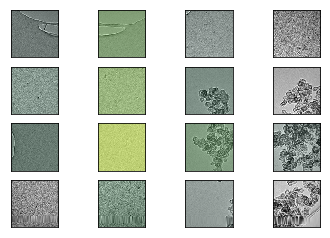

In [3]:
tst.test_heatmap()

In [4]:
df = tst.test_slicestats()

         filename  s_y  s_x  n_y  n_x     alias  img_min  img_median  img_max  \
0  testimage1.tif    0    0    2    2  img0_0-0     96.0       148.0    203.0   
1  testimage1.tif    0    1    2    2  img0_0-1     49.0       146.0    233.0   
2  testimage1.tif    1    0    2    2  img0_1-0    105.0       148.0    202.0   
3  testimage1.tif    1    1    2    2  img0_1-1     53.0       147.0    231.0   
4  testimage2.tif    0    0    2    2  img1_0-0     49.0       146.0    233.0   
5  testimage2.tif    0    1    2    2  img1_0-1     53.0       147.0    231.0   
6  testimage2.tif    1    0    2    2  img1_1-0     96.0       148.0    203.0   
7  testimage2.tif    1    1    2    2  img1_1-1    105.0       148.0    202.0   

     img_std  
0   5.368779  
1  15.152314  
2   4.092438  
3  25.083536  
4  15.152314  
5  25.083536  
6   5.368779  
7   4.092438  


<IPython.core.display.Javascript object>


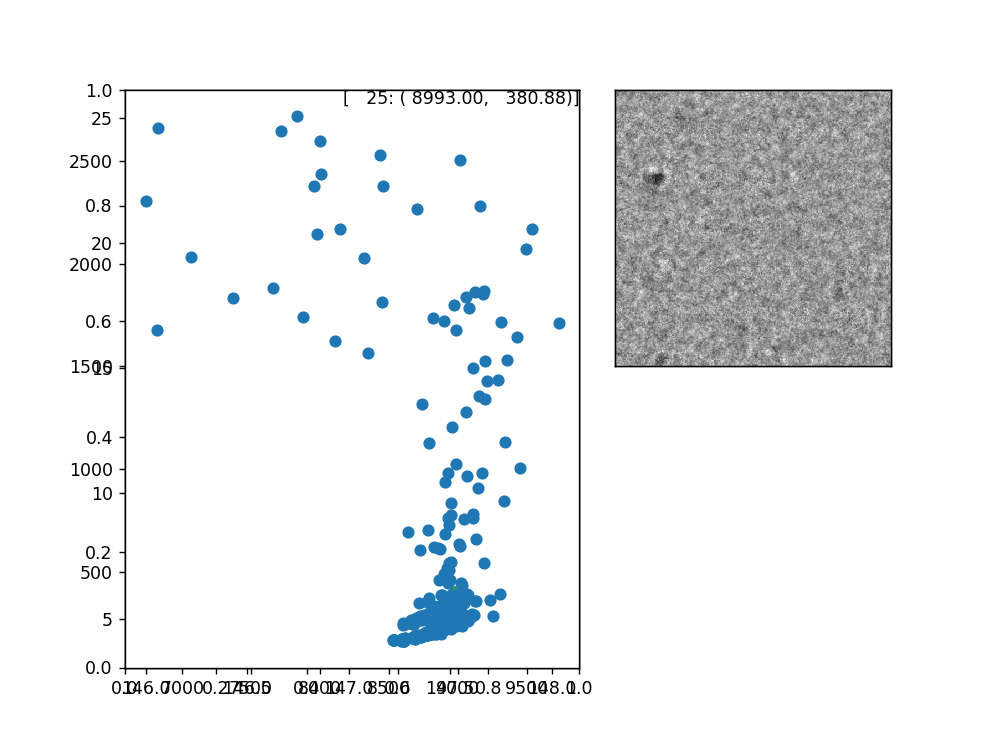

In [6]:
%matplotlib notebook
imgutils.plotwithimg(df, 'img_median', 'img_std', imgutils.getimgslice_fromdf)

## Try Again With more images

In [7]:
statfuncs = [imgutils.img_min, imgutils.img_max, imgutils.img_median, imgutils.img_std]
df_files = imgutils.scanimgdir('../../data/Crystals_Apr_12/Tileset7', '.tif')

In [8]:
df_files.head()

,filename
0,..\..\data\Crystals_Apr_12\Tileset7\Tile_001-0...
1,..\..\data\Crystals_Apr_12\Tileset7\Tile_001-0...
2,..\..\data\Crystals_Apr_12\Tileset7\Tile_001-0...
3,..\..\data\Crystals_Apr_12\Tileset7\Tile_002-0...
4,..\..\data\Crystals_Apr_12\Tileset7\Tile_002-0...


In [9]:
df = imgutils.slicestats(list(df_files['filename'][:]), 8, 8, statfuncs)

In [12]:
print(len(df.index))
df.head()

384


,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_median,img_std
0,..\..\data\Crystals_Apr_12\Tileset7\Tile_001-0...,0,0,8,8,img0_0-0,5419.0,12204.0,8942.0,462.440316
1,..\..\data\Crystals_Apr_12\Tileset7\Tile_001-0...,0,1,8,8,img0_0-1,5622.0,12927.0,9013.0,625.226840
2,..\..\data\Crystals_Apr_12\Tileset7\Tile_001-0...,0,2,8,8,img0_0-2,6000.0,12399.0,8954.0,547.851459
3,..\..\data\Crystals_Apr_12\Tileset7\Tile_001-0...,0,3,8,8,img0_0-3,5726.0,11485.0,8864.0,461.521998
4,..\..\data\Crystals_Apr_12\Tileset7\Tile_001-0...,0,4,8,8,img0_0-4,6084.0,10737.0,8717.0,347.614672


In [14]:
imgutils.plotwithimg(df, 'img_median', 'img_std', imgutils.getimgslice_fromdf, True)